In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [24]:
def load_data():
    file = 'bakerysales.csv'
    df = pd.read_csv(file)

    return df

In [27]:
df = load_data()

In [28]:
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [29]:
# rename new column
df.columns

Index(['Unnamed: 0', 'date', 'time', 'ticket_number', 'article', 'Quantity',
       'unit_price'],
      dtype='object')

In [30]:
df.rename(columns={'unnamed: 0':'id','article': 'product'},
           inplace =True)

# clean the unit price column
# repace the commas and remove the currency symbol

In [31]:
df.unit_price = df.unit_price.str.replace(",",".").str.replace("€","").str.strip()

In [32]:
# the values are still in string types
# so we will covert to float
type(df.unit_price[0])
df.unit_price = df.unit_price.astype('float')

# Research questions on bakery sales data

1. How does sales volume vary over time (date)

2. What is the average unit price for each product ?

3. Is there a correlation btw unit price and total sales

4. is there a pattern in sales based on the date or time of purchase

5. how does quantity sold vary over time ?

6. what is the contribution of each product to the total revenue ?

7. do we have frequent buyers ? based on ticket numbers ?

8. which articles have the lowest and highest sales ?


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   product        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.5+ MB


In [34]:
df['date'] = pd.to_datetime(df.date)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64       
 4   product        234005 non-null  object        
 5   Quantity       234005 non-null  float64       
 6   unit_price     234005 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 12.5+ MB


In [38]:
 # calculate sales
df['sales'] = df.Quantity * df.unit_price

In [39]:
daily_sales = df.groupby('date')['sales'].sum()

In [40]:
daily_sales

date
2021-01-02     987.85
2021-01-03    1014.30
2021-01-04     461.90
2021-01-05     515.70
2021-01-07     544.00
               ...   
2022-09-26     693.75
2022-09-27     746.45
2022-09-28     610.70
2022-09-29     689.20
2022-09-30     795.95
Name: sales, Length: 600, dtype: float64

In [41]:
daily_sales_df = daily_sales.reset_index().rename(columns={'sales':"total sales"})

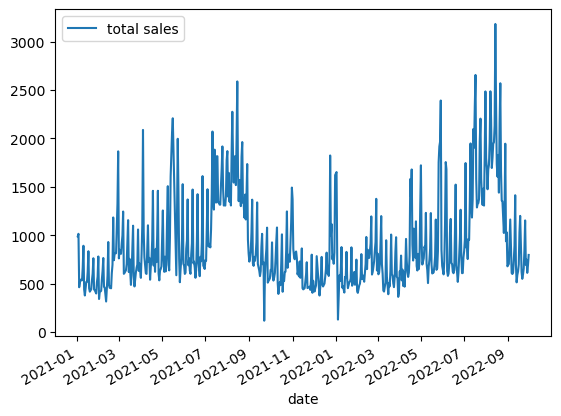

In [42]:
# plot
import matplotlib.pyplot as plt

ax = daily_sales_df.plot(x='date',
                         y='total sales')


In [46]:
# for quantity
daily_qty_sold = df.groupby('date')['Quantity'].sum()

daily_qty_sold


date
2021-01-02    581.0
2021-01-03    564.0
2021-01-04    315.0
2021-01-05    309.0
2021-01-07    310.0
              ...  
2022-09-26    399.0
2022-09-27    423.0
2022-09-28    357.0
2022-09-29    428.0
2022-09-30    503.0
Name: Quantity, Length: 600, dtype: float64

In [47]:
daily_qty_sold_df = daily_qty_sold.reset_index().rename(columns={'Quantity':"total qty"})
daily_qty_sold_df

,date,total qty
0,2021-01-02,581.0
1,2021-01-03,564.0
2,2021-01-04,315.0
3,2021-01-05,309.0
4,2021-01-07,310.0
...,...,...
595,2022-09-26,399.0
596,2022-09-27,423.0
597,2022-09-28,357.0
598,2022-09-29,428.0


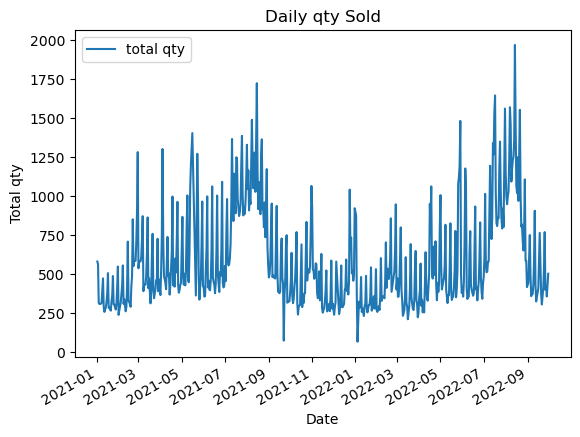

In [48]:
daily_qty_sold_df.plot(x='date', y='total qty')
plt.title('Daily qty Sold')
plt.xlabel('Date')
plt.ylabel('Total qty')
plt.show()

In [ ]:
# price analysis

In [51]:
# average price per product
avg_price_per_prdt = df.groupby('product')['unit_price'].mean()

In [53]:
# Top values
avg_price_per_prdt.sort_values(ascending=False)

product
PLAQUE TARTE 25P    35.000000
BUCHE 8PERS         28.000000
BUCHE 6PERS         21.000000
TARTE FRAISE 6P     19.512000
ROYAL 6P            18.967742
                      ...    
DEMI BAGUETTE        0.470367
SUCETTE              0.300000
COUPE                0.150000
ARTICLE 295          0.000000
.                    0.000000
Name: unit_price, Length: 149, dtype: float64

In [54]:
# correlation between the price and sales

corr = df['unit_price'].corr(df['sales'])
print(f"correlation btwn unit Price and Sales: {corr} ")

correlation btwn unit Price and Sales: 0.690530895105798 


In [55]:
# Top ticket number

top_tickets = df['ticket_number'].value_counts()
top_tickets.head(10)

ticket_number
225766.0    13
227073.0    12
241088.0    12
160751.0    12
202116.0    12
155163.0    12
239966.0    11
242118.0    11
199889.0    11
281951.0    11
Name: count, dtype: int64